In [1]:
import json

In [15]:
with open('./Argumentation_Framework_tests/test2.json', 'r') as f:
    data = json.load(f)

In [16]:
data

{'Arguments': {'0': 'We should go to the park.',
  '1': 'We should stay home and study.',
  '2': 'Studying at home is more efficient than at the park.',
  '3': 'The park is more relaxing than home.',
  '4': 'We have a test next week.',
  '5': 'We need relaxation for better performance.',
  '6': 'We have no money for transport to the park.',
  '7': 'We just got our allowances.',
  '8': 'The weather forecast predicts rain.'},
 'Attack Relations': [['0', '1'],
  ['1', '0'],
  ['2', '0'],
  ['3', '1'],
  ['4', '0'],
  ['4', '3'],
  ['5', '1'],
  ['5', '4'],
  ['6', '0'],
  ['7', '6'],
  ['8', '0']]}

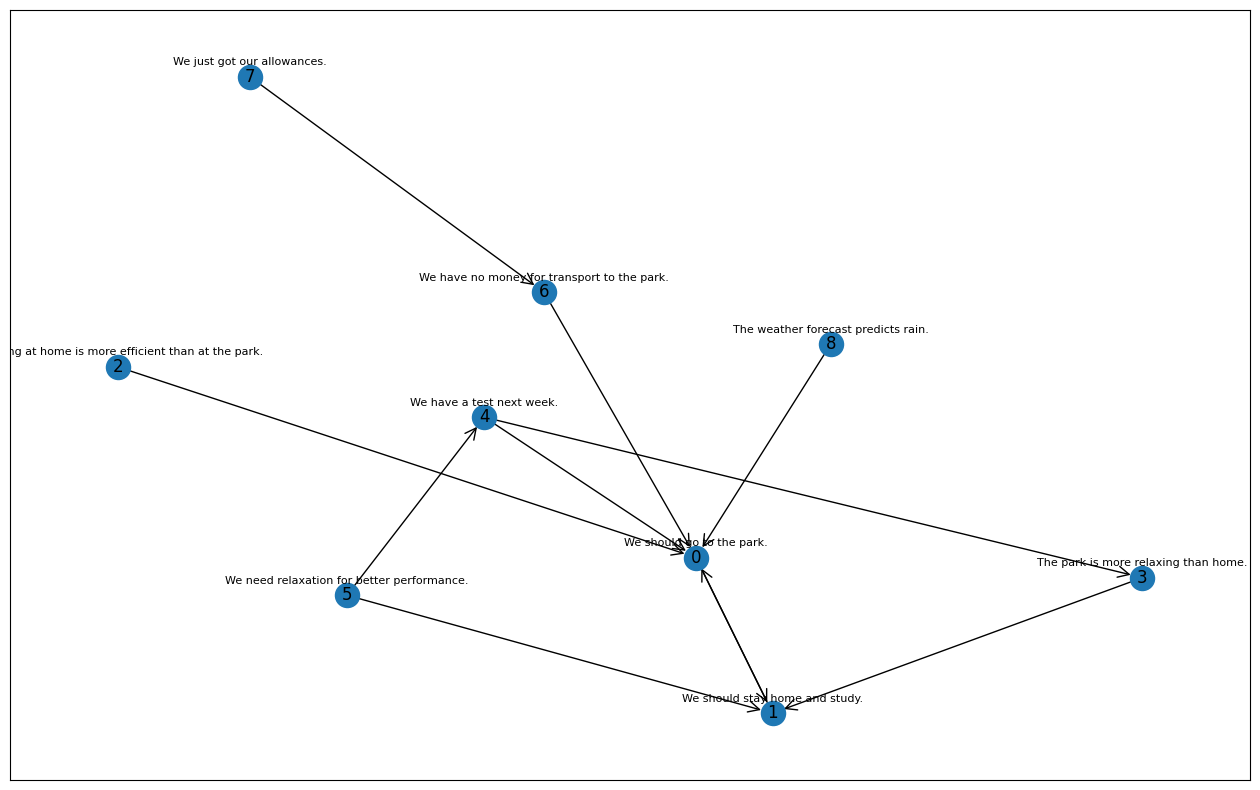

In [38]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(data):
    # Initialize a directed graph
    G = nx.DiGraph()

    # Add nodes to the graph
    G.add_nodes_from(data['Arguments'].keys())

    # Add edges to the graph
    G.add_edges_from(data['Attack Relations'])

    # Define position layout
    pos = nx.spring_layout(G, seed=24)

    # Create a figure with a specific size (width, height)
    plt.figure(figsize=(16, 10))

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edge_color='black', arrowstyle='->', arrowsize=20)

    # Draw the node labels (which are the keys)
    nx.draw_networkx_labels(G, pos, font_size=12)

    # Draw the argument text next to the nodes
    argument_text = {k: f'{v}' for k, v in data['Arguments'].items()}
    pos_higher = {k: (v[0], v[1]+0.04) for k, v in pos.items()}  # positions for argument text
    nx.draw_networkx_labels(G, pos_higher, labels=argument_text, horizontalalignment='center', font_size=8)

    # Adjust the figure's margins
    # plt.subplots_adjust(left=0.1, right=1.5, top=1.5, bottom=0.1)
    # plt.savefig('Graph1.png')
    plt.show()

# Call the function with your data
draw_graph(data)



In [39]:
import networkx as nx
import matplotlib.pyplot as plt

class Game:
    def __init__(self, data, claimed_argument, verbose=False, show_graph=False):
        self.data = data
        self.claimed_argument = claimed_argument
        self.proponent_arguments = []
        self.opponent_arguments = []
        self.verbose = verbose
        self.show_graph = show_graph

    def draw_graph(self):
        if not self.show_graph:
            return

        G = nx.DiGraph()
        G.add_nodes_from(self.data['Arguments'].keys())
        G.add_edges_from(self.data['Attack Relations'])
        pos = nx.spring_layout(G, seed=24)  # Graph Layout
        plt.figure(figsize=(16, 10))
        nx.draw_networkx_nodes(G, pos, nodelist=self.proponent_arguments, node_color='blue')
        nx.draw_networkx_nodes(G, pos, nodelist=self.opponent_arguments, node_color='red')
        nx.draw_networkx_edges(G, pos, edge_color='black', arrowstyle='->', arrowsize=20)
        nx.draw_networkx_labels(G, pos, font_size=12)
        argument_text = {k: f'{v}' for k, v in self.data['Arguments'].items()}
        pos_higher = {k: (v[0], v[1]+0.04) for k, v in pos.items()}
        nx.draw_networkx_labels(G, pos_higher, labels=argument_text, horizontalalignment='center', font_size=8)
        plt.show(block=False)

    def proponent_turn(self):
        if not self.proponent_arguments:
            argument = self.claimed_argument
        else:
            # Find an argument that attacks the opponent's last argument and has not been used by the proponent
            for relation in self.data['Attack Relations']:
                if relation[1] == self.opponent_arguments[-1] and relation[0] not in self.proponent_arguments:
                    argument = relation[0]
                    break
            else:
                print("Proponent cannot make a move. Opponent wins!")
                return False

        self.proponent_arguments.append(argument)
        print(f"Proponent's argument: {self.data['Arguments'][argument]}")
        self.draw_graph()
        if self.verbose:
            print("Game state:", self.__dict__)
        return True

    def opponent_turn(self):
        options = [relation[0] for relation in self.data['Attack Relations'] if relation[1] == self.proponent_arguments[-1] and relation[0] not in self.opponent_arguments]

        if not options:
            print("Opponent has no choices left. Proponent wins!")
            return False

        print("Opponent's options:")
        for i, option in enumerate(options):
            print(f"{i+1}. {self.data['Arguments'][option]}")

        while True:
            try:
                choice = int(input("Enter the number of your choice: ")) - 1
                if choice < 0 or choice >= len(options):
                    raise ValueError
                break
            except ValueError:
                print("Invalid input. Please enter a number corresponding to one of the options.")

        argument = options[choice]

        self.opponent_arguments.append(argument)
        print(f"Opponent's argument: {self.data['Arguments'][argument]}")
        # self.draw_graph()
        if self.verbose:
            print("Game state:", self.__dict__)
        return True

    def play(self):
        while True:
            print("Proponent's turn...")
            if not self.proponent_turn():
                break
            print("Opponent's turn...")
            if not self.opponent_turn():
                break
        self.draw_graph()  # Draw the graph after the game



In [41]:
game = Game(data, '0', verbose=False, show_graph=False)  # Replace '0' with the claimed argument
game.play()

Proponent's turn...
Proponent's argument: We should go to the park.
Opponent's turn...
Opponent's options:
1. We should stay home and study.
2. Studying at home is more efficient than at the park.
3. We have a test next week.
4. We have no money for transport to the park.
5. The weather forecast predicts rain.


Enter the number of your choice:  1


Opponent's argument: We should stay home and study.
Proponent's turn...
Proponent's argument: The park is more relaxing than home.
Opponent's turn...
Opponent's options:
1. We have a test next week.


Enter the number of your choice:  1


Opponent's argument: We have a test next week.
Proponent's turn...
Proponent's argument: We need relaxation for better performance.
Opponent's turn...
Opponent has no choices left. Proponent wins!


Proponent's turn...
Proponent's argument: We should go to the park.


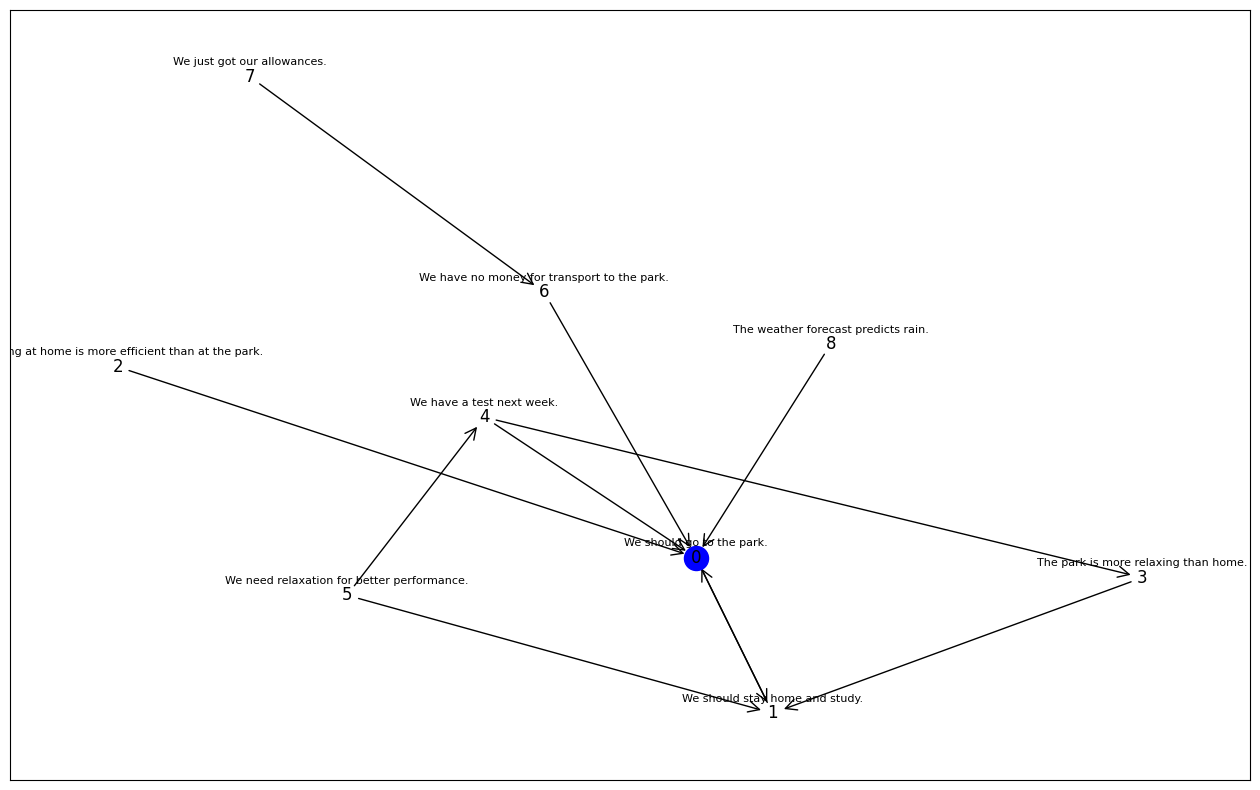

Opponent's turn...
Opponent's options:
1. We should stay home and study.
2. Studying at home is more efficient than at the park.
3. We have a test next week.
4. We have no money for transport to the park.
5. The weather forecast predicts rain.


Enter the number of your choice:  1


Opponent's argument: We should stay home and study.
Proponent's turn...
Proponent's argument: The park is more relaxing than home.


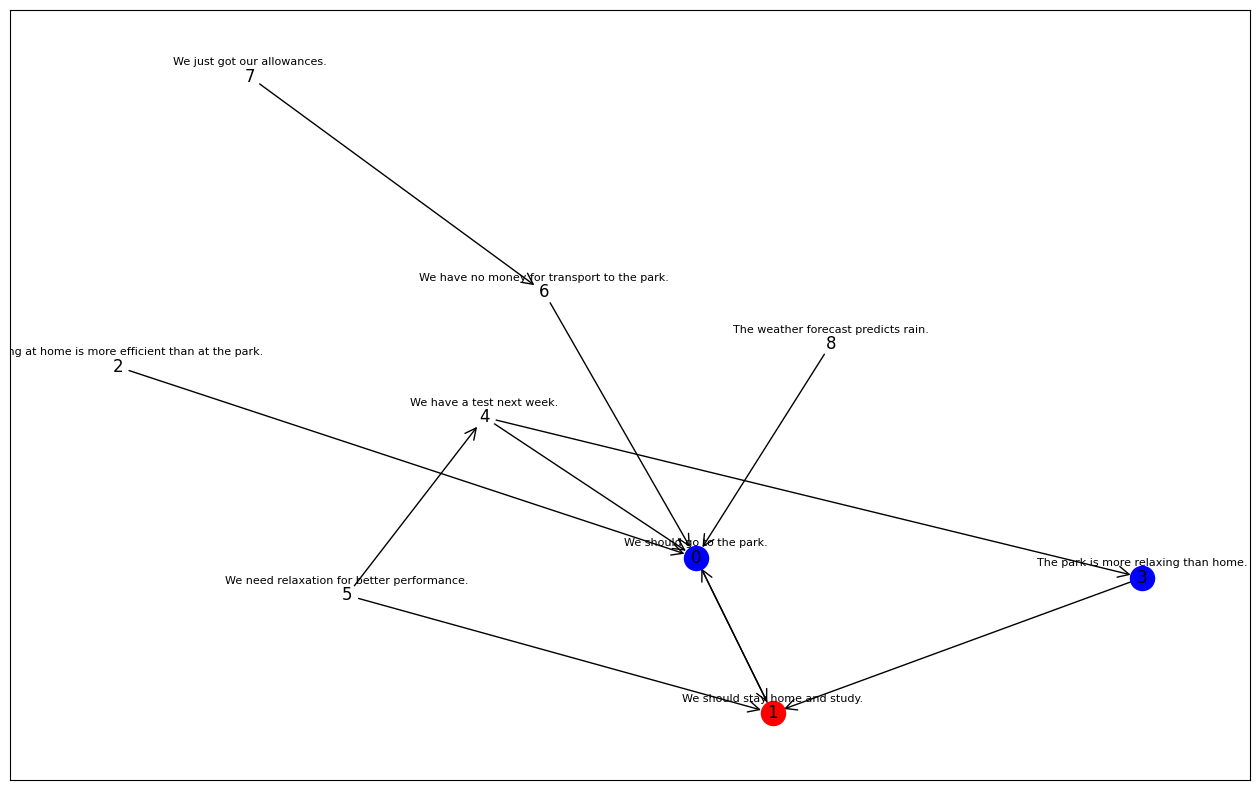

Opponent's turn...
Opponent's options:
1. We have a test next week.


Enter the number of your choice:  1


Opponent's argument: We have a test next week.
Proponent's turn...
Proponent's argument: We need relaxation for better performance.


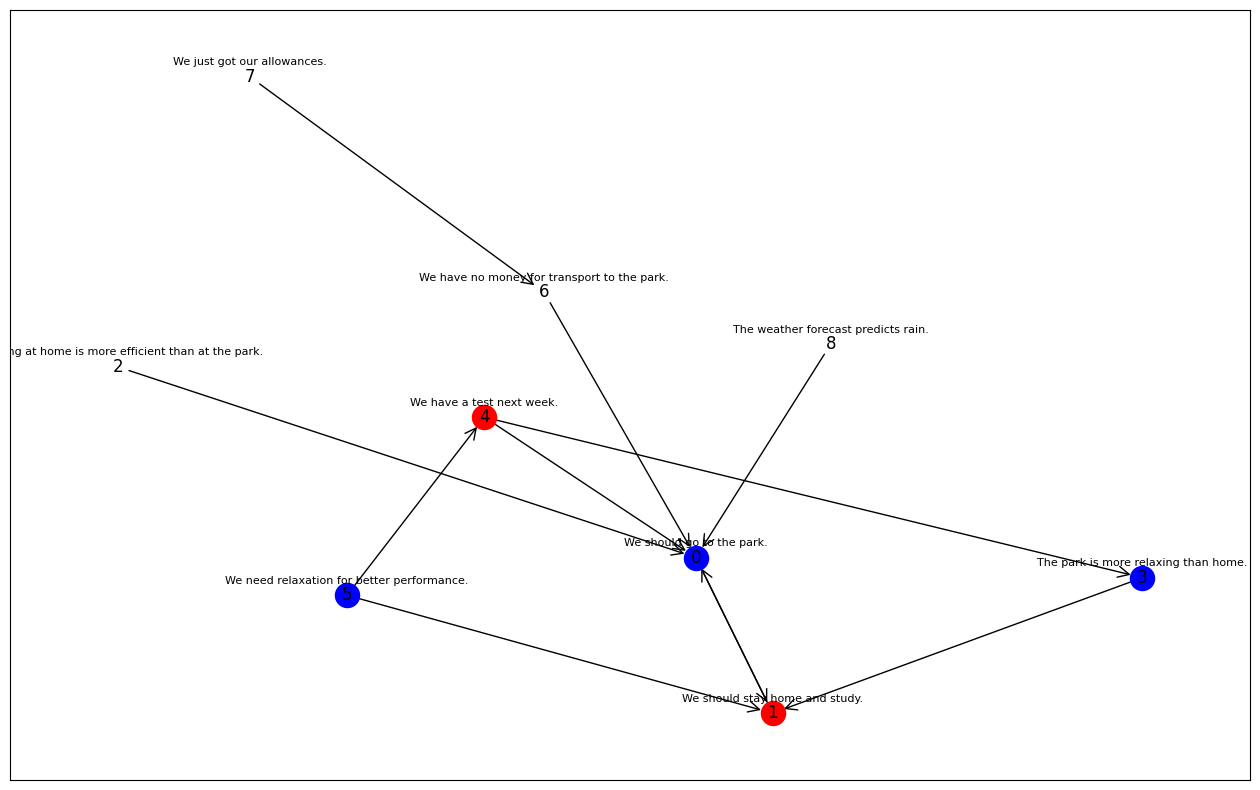

Opponent's turn...
Opponent has no choices left. Proponent wins!


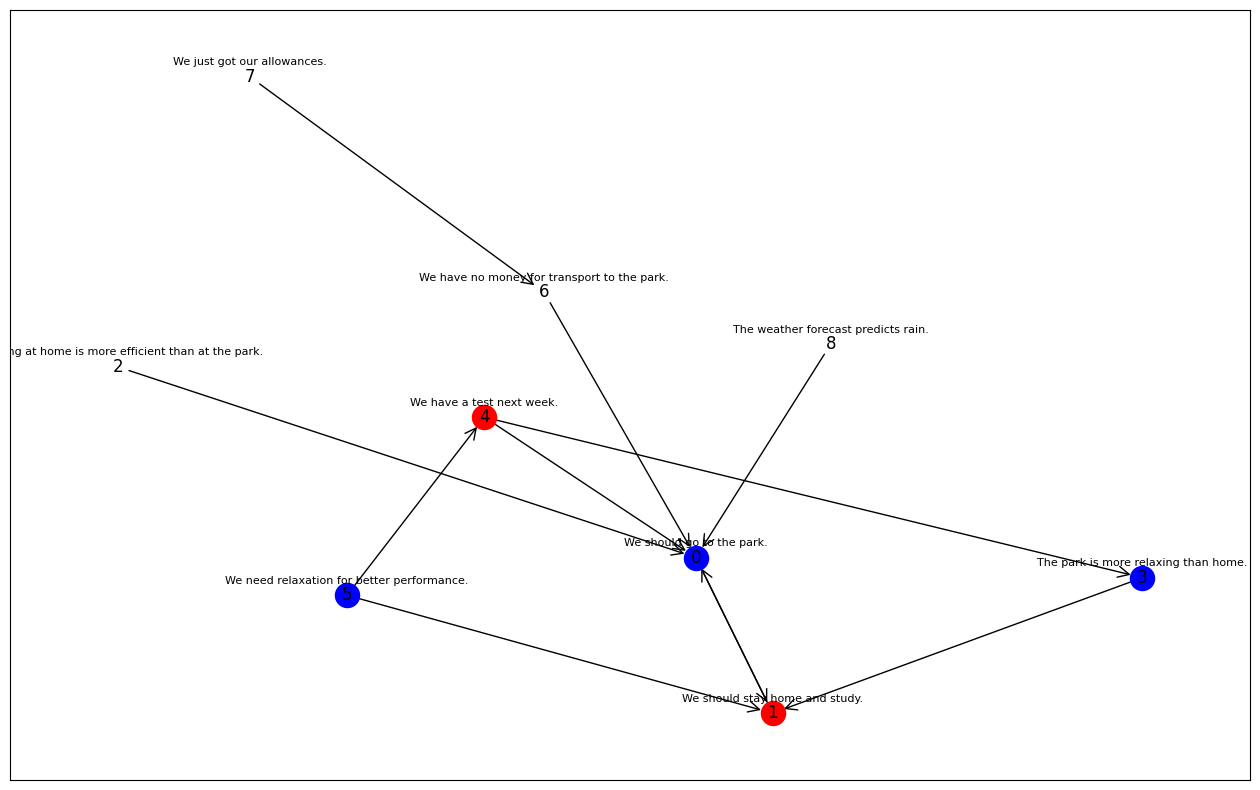

In [42]:
%matplotlib inline
game = Game(data, '0', verbose=False, show_graph=True)  # Replace '0' with the claimed argument
game.play()